In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [2]:
file = "~/Desktop/ETH-USD.csv"
df = pd.read_csv(file)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [3]:
df_eth = df[["Date", "Volume"]]
df_eth = df_eth.rename(columns={"Date":"ds", "Volume":"y"})
df_eth.head()

,ds,y
0,2017-11-09,893249984
1,2017-11-10,885985984
2,2017-11-11,842300992
3,2017-11-12,1613479936
4,2017-11-13,1041889984


In [4]:
df_eth_P = df[["Date", "High"]]
df_eth_P = df_eth_P.rename(columns={"Date":"ds", "High":"y"})
df_eth_P.head()

,ds,y
0,2017-11-09,329.451996
1,2017-11-10,324.717987
2,2017-11-11,319.453003
3,2017-11-12,319.153015
4,2017-11-13,328.415009


In [5]:
model_eth = Prophet()


In [6]:
model_eth_P = Prophet()

In [7]:
model_eth.fit(df_eth)

18:58:39 - cmdstanpy - INFO - Chain [1] start processing
18:58:40 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
model_eth_P.fit(df_eth_P)

18:58:40 - cmdstanpy - INFO - Chain [1] start processing
18:58:40 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future_eth = model_eth.make_future_dataframe(periods=52, freq="w")
future_eth.head()


,ds
0,2017-11-09
1,2017-11-10
2,2017-11-11
3,2017-11-12
4,2017-11-13


In [10]:
future_eth_P = model_eth_P.make_future_dataframe(periods=52, freq="w")
future_eth_P.head()

,ds
0,2017-11-09
1,2017-11-10
2,2017-11-11
3,2017-11-12
4,2017-11-13


In [16]:
# Make predictions for Canada using the future_canada DataFrame
forecast_eth = model_eth.predict(future_eth)

# Display the first five rows of the forecast_canada DataFrame
forecast_eth.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,1.478468e+09,-5.947494e+09,8.647846e+09,1.478468e+09,1.478468e+09,-2.383768e+08,-2.383768e+08,-2.383768e+08,8.671757e+08,8.671757e+08,8.671757e+08,-1.105553e+09,-1.105553e+09,-1.105553e+09,0.0,0.0,0.0,1.240091e+09
1,2017-11-10,1.480616e+09,-6.018842e+09,7.978902e+09,1.480616e+09,1.480616e+09,-7.004268e+08,-7.004268e+08,-7.004268e+08,4.474660e+08,4.474660e+08,4.474660e+08,-1.147893e+09,-1.147893e+09,-1.147893e+09,0.0,0.0,0.0,7.801890e+08
2,2017-11-11,1.482764e+09,-8.845616e+09,5.698284e+09,1.482764e+09,1.482764e+09,-3.275685e+09,-3.275685e+09,-3.275685e+09,-2.090105e+09,-2.090105e+09,-2.090105e+09,-1.185580e+09,-1.185580e+09,-1.185580e+09,0.0,0.0,0.0,-1.792922e+09
3,2017-11-12,1.484912e+09,-9.035646e+09,5.152698e+09,1.484912e+09,1.484912e+09,-3.204825e+09,-3.204825e+09,-3.204825e+09,-1.987586e+09,-1.987586e+09,-1.987586e+09,-1.217239e+09,-1.217239e+09,-1.217239e+09,0.0,0.0,0.0,-1.719914e+09
4,2017-11-13,1.487059e+09,-6.138829e+09,8.035002e+09,1.487059e+09,1.487059e+09,-4.744542e+08,-4.744542e+08,-4.744542e+08,7.673996e+08,7.673996e+08,7.673996e+08,-1.241854e+09,-1.241854e+09,-1.241854e+09,0.0,0.0,0.0,1.012605e+09


In [17]:
# Make predictions for Canada using the future_canada DataFrame
forecast_eth_P = model_eth_P.predict(future_eth_P)

# Display the first five rows of the forecast_canada DataFrame
forecast_eth_P.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,800.894334,374.297658,1167.372660,800.894334,800.894334,-7.537512,-7.537512,-7.537512,5.873841,5.873841,5.873841,-13.411353,-13.411353,-13.411353,0.0,0.0,0.0,793.356822
1,2017-11-10,799.508737,381.756954,1174.783513,799.508737,799.508737,-20.619269,-20.619269,-20.619269,-1.206639,-1.206639,-1.206639,-19.412629,-19.412629,-19.412629,0.0,0.0,0.0,778.889468
2,2017-11-11,798.123140,311.988309,1114.394415,798.123140,798.123140,-38.640640,-38.640640,-38.640640,-13.079526,-13.079526,-13.079526,-25.561113,-25.561113,-25.561113,0.0,0.0,0.0,759.482500
3,2017-11-12,796.737543,368.125502,1144.284083,796.737543,796.737543,-40.843045,-40.843045,-40.843045,-9.136809,-9.136809,-9.136809,-31.706236,-31.706236,-31.706236,0.0,0.0,0.0,755.894498
4,2017-11-13,795.351946,359.510360,1155.973407,795.351946,795.351946,-32.812197,-32.812197,-32.812197,4.894701,4.894701,4.894701,-37.706898,-37.706898,-37.706898,0.0,0.0,0.0,762.539749


/Users/avalee/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/avalee/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


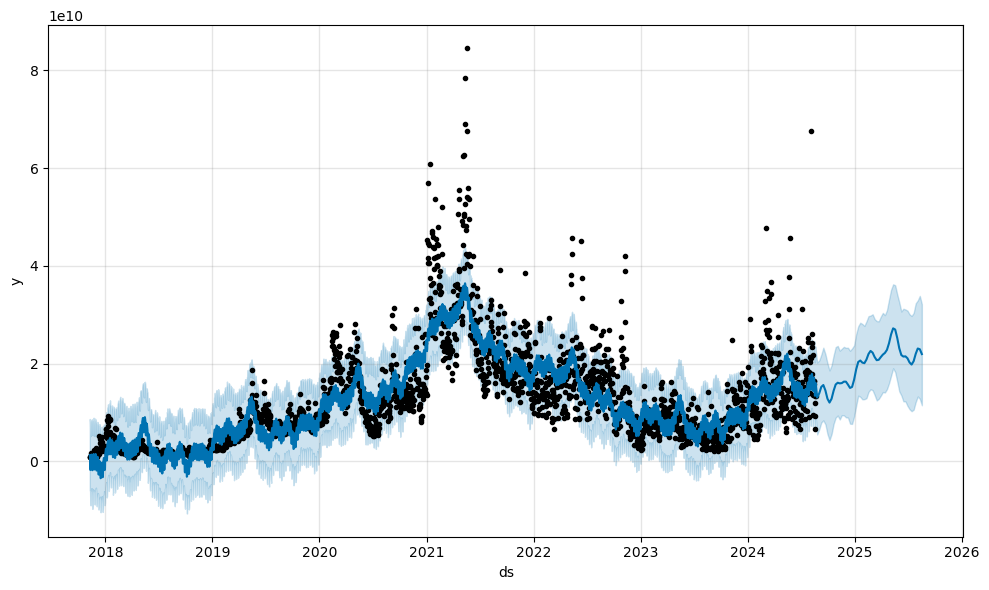

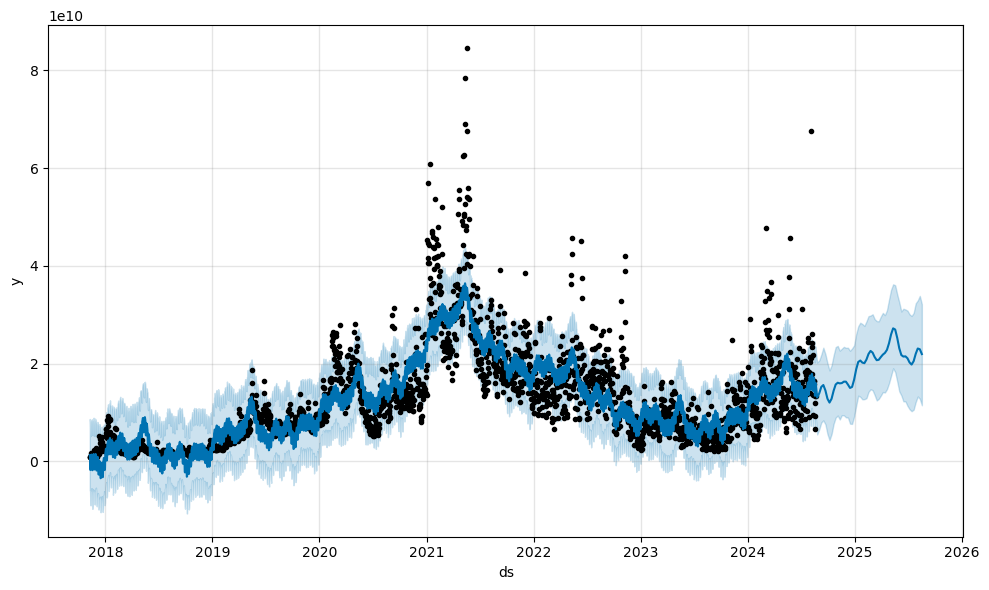

In [18]:
model_eth.plot(forecast_eth)

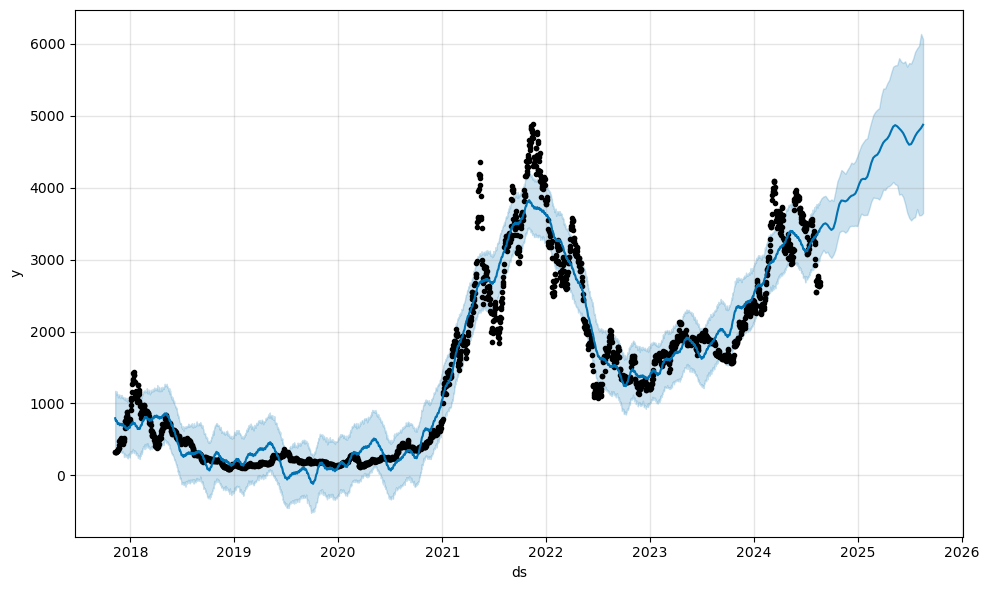

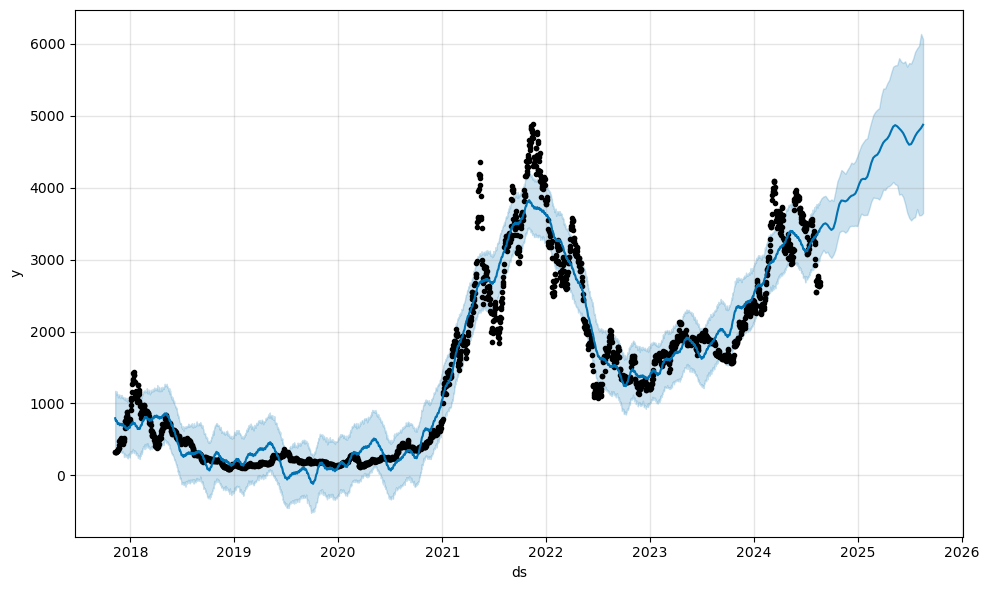

In [19]:
model_eth_P.plot(forecast_eth_P)

In [15]:
# Make predictions for Canada using the future_canada DataFrame
forecast_eth_P = model_eth_P.predict(future_eth)

# Display the first five rows of the forecast_canada DataFrame
forecast_eth_P.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,800.894334,424.263351,1199.544552,800.894334,800.894334,-7.537512,-7.537512,-7.537512,5.873841,5.873841,5.873841,-13.411353,-13.411353,-13.411353,0.0,0.0,0.0,793.356822
1,2017-11-10,799.508737,423.732216,1166.379935,799.508737,799.508737,-20.619269,-20.619269,-20.619269,-1.206639,-1.206639,-1.206639,-19.412629,-19.412629,-19.412629,0.0,0.0,0.0,778.889468
2,2017-11-11,798.123140,353.858284,1142.631434,798.123140,798.123140,-38.640640,-38.640640,-38.640640,-13.079526,-13.079526,-13.079526,-25.561113,-25.561113,-25.561113,0.0,0.0,0.0,759.482500
3,2017-11-12,796.737543,381.930827,1140.006921,796.737543,796.737543,-40.843045,-40.843045,-40.843045,-9.136809,-9.136809,-9.136809,-31.706236,-31.706236,-31.706236,0.0,0.0,0.0,755.894498
4,2017-11-13,795.351946,384.111559,1162.285033,795.351946,795.351946,-32.812197,-32.812197,-32.812197,4.894701,4.894701,4.894701,-37.706898,-37.706898,-37.706898,0.0,0.0,0.0,762.539749
